In [1]:
import sys
sys.path.append('../')
import src.utils as utils
from importlib import reload
import numpy as np
import matplotlib.pyplot as plt
reload(utils)

<module 'src.utils' from '/Users/leandro_1/Documents/GitHub/kcl-continuous-time-finance/notebooks/../src/utils.py'>

In [2]:
#import pandas as pd
#import scipy.stats as stats
#import seaborn as sns
#from scipy import integrate

In [3]:
import matplotlib.pylab as pylab
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 5),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
pylab.rcParams.update(params)
%config InlineBackend.figure_format = "retina"

In [4]:
%load_ext autoreload
%autoreload 2

In [5]:
np.random.seed(100)

## Brownian motion
$$
\left(W_t\right)_{t\in[0,1]}
$$


In [6]:
BM = utils.BrownianMotion(T = 1, Nt = 1_000)

In [7]:
sims = BM.simulate_BM(nsims = 3)
time = BM.timesteps

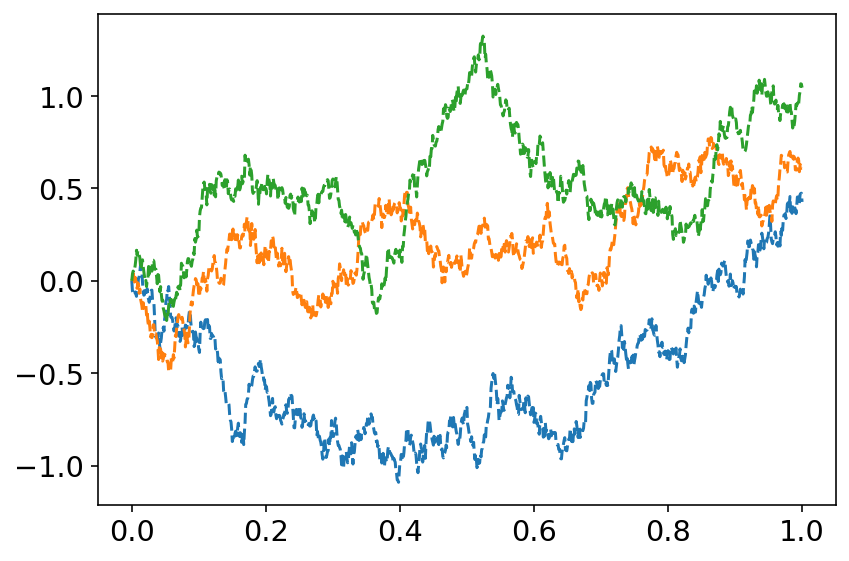

In [8]:
plt.figure()
plt.plot(time, sims, linestyle = '--')
resolution_value = 50
#plt.title('Five simulations of a Brownian motion')
plt.tight_layout()
plt.savefig('../figures/sample_path_Brownian_motion.pdf', format="pdf", dpi=resolution_value)
plt.show()

## Geometric Brownian motion
$$
\left(S_t\right)_{t\in[0,1]}
$$
where 
$$
S_t = S_0 \,e^{\left(\mu - \frac12 \sigma^2\right)\,t + \sigma\, W_t}
$$

In [9]:
GBM = utils.GeometricBrownianMotion(x0 = 100, mu = 0.01, sigma = 0.05, T = 1, Nt = 1_000)

In [10]:
sims = GBM.simulate_GBM(nsims = 3)
time = GBM.timesteps

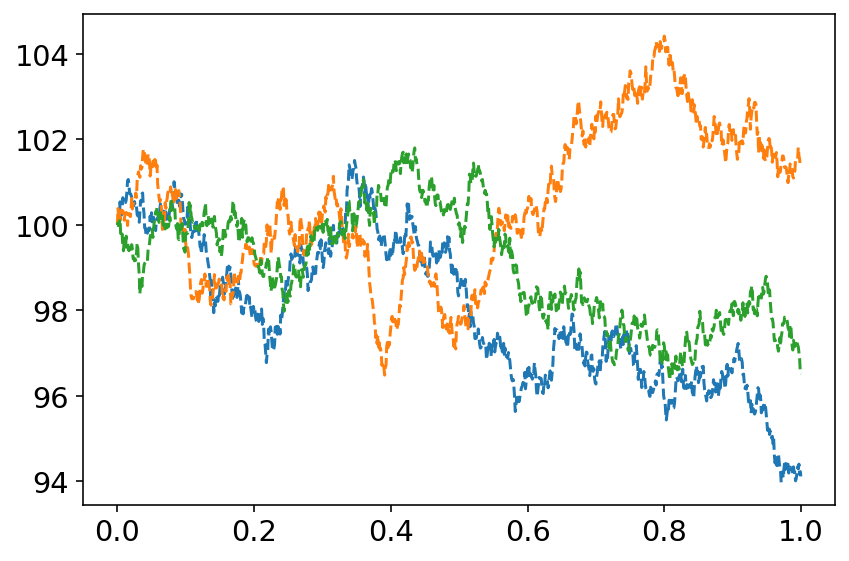

In [11]:
plt.figure()
plt.plot(time, sims, linestyle = '--')
resolution_value = 50
#plt.title('Five simulations of a Geometric Brownian motion')
plt.tight_layout()
plt.savefig('../figures/sample_path_Geometric_Brownian_motion.pdf', format="pdf", dpi=resolution_value)
plt.show()

In [13]:
def call_option_payoff(K, S):
    return np.maximum(S-K,0)

In [14]:
K = 100
S = np.linspace(start = 0,stop = 200, num = 1000)
payoff = call_option_payoff(K = K, S = S)

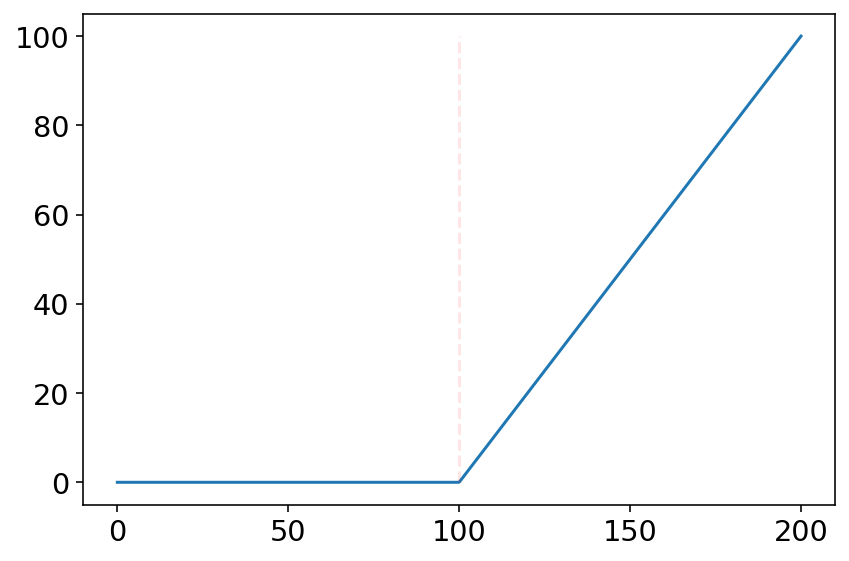

In [15]:
plt.figure()
plt.plot(S, payoff, linestyle = '-')
plt.vlines(x = K, ymin = 0, ymax = np.max(payoff), color = 'r', linestyles='--', alpha = 0.1)
resolution_value = 50
plt.tight_layout()
plt.savefig('../figures/hockey_stick.pdf', format="pdf", dpi=resolution_value)
plt.show()